In [128]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [129]:
chords = ["C", "E", "F", "G"]
index = []

for i in range(21):
    index.append(f'{i}x')
    index.append(f'{i}y')
index.append('chord')

chord_dataset = pd.DataFrame(columns=index) 

for chord in chords:
    dataset = pd.read_csv(f'./data/{chord}.txt', sep=' ', header=None)
    dataset.loc[:, 42] = chord
    print(dataset)
    dataset.columns = index

    chord_dataset = chord_dataset.append(dataset, ignore_index=True)

       0    1    2    3    4    5    6    7    8    9   ...   33   34   35  \
0     144  211  144  184  148  159  161  146  173  138  ...  192  159  203   
1     144  213  142  178  142  154  147  139  151  129  ...  207  156  217   
2     144  212  134  189  131  166  130  151  128  136  ...  211  166  218   
3     159  209  156  177  158  153  163  138  172  132  ...  200  172  222   
4     156  223  152  195  159  172  175  161  191  154  ...  208  164  224   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1490  509  220  517  222  522  222  525  222  527  222  ...  223  525  217   
1491  416  320  413  319  410  316  408  309  406  302  ...  308  427  316   
1492  510  221  513  218  517  218  521  219  523  221  ...  226  524  222   
1493  511  222  514  219  517  218  520  219  521  220  ...  224  524  222   
1494  413  319  409  320  407  316  403  307  401  296  ...  305  420  310   

       36   37   38   39   40   41  42  
0     174  200  190  2

C:\Users\Mushr\AppData\Local\Temp\ipykernel_5544\2871842078.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chord_dataset = chord_dataset.append(dataset, ignore_index=True)
C:\Users\Mushr\AppData\Local\Temp\ipykernel_5544\2871842078.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chord_dataset = chord_dataset.append(dataset, ignore_index=True)
C:\Users\Mushr\AppData\Local\Temp\ipykernel_5544\2871842078.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chord_dataset = chord_dataset.append(dataset, ignore_index=True)
C:\Users\Mushr\AppData\Local\Temp\ipykernel_5544\2871842078.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

In [130]:
chord_dataset

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,16y,17x,17y,18x,18y,19x,19y,20x,20y,chord
0,144,211,144,184,148,159,161,146,173,138,...,192,159,203,174,200,190,202,200,204,C
1,144,213,142,178,142,154,147,139,151,129,...,207,156,217,174,221,191,222,202,222,C
2,144,212,134,189,131,166,130,151,128,136,...,211,166,218,183,228,197,232,210,232,C
3,159,209,156,177,158,153,163,138,172,132,...,200,172,222,194,224,212,225,223,224,C
4,156,223,152,195,159,172,175,161,191,154,...,208,164,224,188,224,207,226,220,224,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4628,343,277,377,223,400,181,405,142,404,110,...,197,331,290,309,261,304,243,306,233,G
4629,350,265,377,210,393,168,397,135,399,101,...,192,341,288,313,266,305,245,305,230,G
4630,402,253,421,222,426,200,419,176,406,146,...,192,350,283,322,281,313,259,313,237,G
4631,353,263,371,208,384,165,390,135,395,101,...,198,365,294,333,274,317,249,312,231,G


数据预处理
1. 移动到原点 减去坐标0.0
2. 计算旋转向量 (0, 9) 标准化，计算旋转角, arcsin(), 反向旋转
3. 将所有的坐标放缩相同比例，除以 (0, 17)

In [131]:
def getPairs(points):
    paris = []
    for ind in range(0, 21):
        paris.append([points[ind*2], points[ind*2+1]])
    return paris, points[-1]


def plotGesture(paris, chord = None):
    print(paris)
    plt.scatter(
        [point[0] for point in paris],
        [point[1] for point in paris],
    )

    for i, point in enumerate(paris):
        plt.annotate(i, (point[0], point[1]))
    
    if chord:
        plt.title(chord)

[[421, 382], [460, 360], [483, 319], [476, 272], [465, 242], [519, 331], [522, 256], [510, 204], [501, 164], [484, 342], [479, 249], [464, 231], [460, 235], [439, 341], [426, 241], [419, 233], [418, 246], [396, 334], [393, 249], [395, 239], [399, 246]]


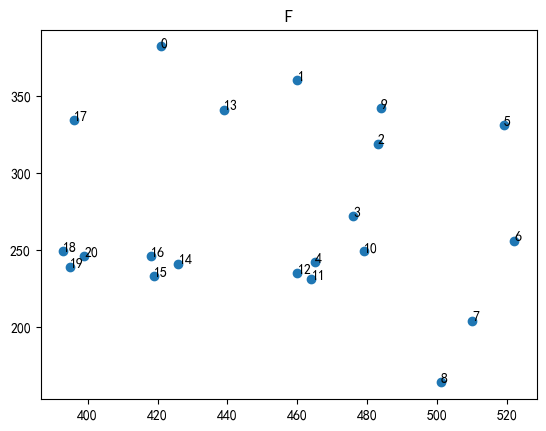

In [132]:
plotGesture(*getPairs(chord_dataset.iloc[3000]))

In [133]:
def centralize(points):
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    return [[x - x_mean, y - y_mean] for x, y in points]
    

[[-32.76190476190476, 109.8095238095238], [6.238095238095241, 87.8095238095238], [29.23809523809524, 46.809523809523796], [22.23809523809524, -0.190476190476204], [11.23809523809524, -30.190476190476204], [65.23809523809524, 58.809523809523796], [68.23809523809524, -16.190476190476204], [56.23809523809524, -68.1904761904762], [47.23809523809524, -108.1904761904762], [30.23809523809524, 69.8095238095238], [25.23809523809524, -23.190476190476204], [10.23809523809524, -41.190476190476204], [6.238095238095241, -37.190476190476204], [-14.76190476190476, 68.8095238095238], [-27.76190476190476, -31.190476190476204], [-34.76190476190476, -39.190476190476204], [-35.76190476190476, -26.190476190476204], [-57.76190476190476, 61.809523809523796], [-60.76190476190476, -23.190476190476204], [-58.76190476190476, -33.190476190476204], [-54.76190476190476, -26.190476190476204]]
[[421, 382], [460, 360], [483, 319], [476, 272], [465, 242], [519, 331], [522, 256], [510, 204], [501, 164], [484, 342], [479,

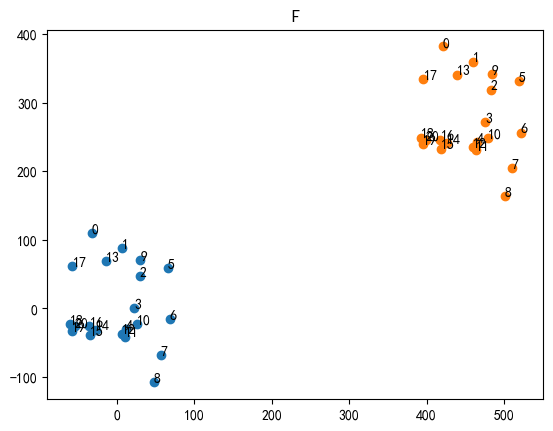

In [134]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plotGesture(centralize(getPairs(chord_dataset.iloc[3000])[0]), chord_dataset.iloc[3000]['chord'])
plotGesture(*getPairs(chord_dataset.iloc[3000]))

In [135]:
# rotate all points to y axis
def rotate(points):
    start_vec = points[0]
    end_vec = points[13]
    vec = [end_vec[0] - start_vec[0], end_vec[1] - start_vec[1]]
    angle = np.arctan2(vec[1], vec[0])
    return [[x * np.cos(angle) + y * np.sin(angle), -x * np.sin(angle) + y * np.cos(angle)] for x, y in points]

def scale(points, scl = 0.01):
    start_vec = points[0]
    end_vec = points[13]
    vec = [end_vec[0] - start_vec[0], end_vec[1] - start_vec[1]]
    length = np.sqrt(vec[0] ** 2 + vec[1] ** 2) * scl
    return [[x / length, y / length] for x, y in points]

def decompose(points):
    flatten = []
    for point in points:
        flatten.append(point[0])
        flatten.append(point[1])
    return flatten

def process_line(points, scl = 0.01):
    return decompose(scale(rotate(centralize(points)), scl))

In [136]:
for i, line in enumerate(chord_dataset.values):
    chord_dataset.iloc[i, :42] = process_line(getPairs(line)[0])

In [137]:

def getchord(chord):
    print(chord)
    return chord_dataset.columns[42:][chord == 1].values[0]

In [138]:
# OK 开始预测
chord_dataset = pd.get_dummies(chord_dataset, columns=['chord'])


In [139]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# one hot
X = chord_dataset.iloc[:, :42]
y = chord_dataset.iloc[:, 42:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8500539374325782

In [140]:
# final version


array([1, 0, 0, 0], dtype=uint8)